In [ ]:
#Mounting to the google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Mounting dataset

#_____________ simplified setup of PJM ________________

#This is a simplified setup including only some of the letters. The data can be downloaded from:
! git clone  https://github.com/EwaSzyszka/Stillness   

#_________________ complete PJM100 _____________________

#For complete PJM 100 dataset two set ups are recomended:
#(1) Downloading filed localy from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/K142HP 

#(2) Cloning files from the repository: 
#! git clone  https://github.com/ESzyszka/PJM100

#_______________________________________________________

Cloning into 'Stillness'...
remote: Enumerating objects: 106, done.
remote: Total 106 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (106/106), 36.09 MiB | 39.40 MiB/s, done.


In [3]:
#Checking the location that we are at 

! ls

gdrive	sample_data  Stillness


In [4]:
#Checking the working directory 

! pwd

/content


In [ ]:
#___________________ HERE BEGINS THE VGG MODEL ___________________

In [5]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten 
import keras

#Model loading imports 
import json
import numpy as np
from keras import models
from keras.models import model_from_json, load_model

#Data procesing imports 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
import random
import pickle

#Visualization imports 
import os
import cv2
import glob
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline

In [7]:

#_____ SETTING THE DATA PATH ______
DATADIR = "/content/Stillness/"
#DATADIR = "/content/PJM100/"

#_____ CATEGORIES OF CLASSES ______
CATEGORIES = ['A','B']
#This is the final list for PJM100:
#CATEGORIES = ["A","A_", "B", "C","C_","CH","CZ" "D", "E","E_","F", "G", "I","J", "K" , "L","L_" "M", "N","N_" , "O","O_" "P", "R","RZ" "S","S_" "T" , "U" , "W", "Y","Z","Z_o","Z_" ]

#_____ SETTING UP THE TRAINING DATA ______

'''setting the size of the images to 50x50'''
IMG_SIZE = 224

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        '''One hot encoding'''
        one_hot_target = np.zeros(len(CATEGORIES))
        class_num = CATEGORIES.index(category)  
        one_hot_target[class_num] = 1
        
        for img in os.listdir(path):
            try:
                '''resizing the images and attaching one hot encoded values'''
                img_array = cv2.imread(os.path.join(path, img)) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),3)   
                training_data.append([new_array,one_hot_target])  
            except Exception as e:
                pass

create_training_data()

#___ SHUFFLING THE DATA TO IMPROVE THE TRAINING QUALITY _____
random.shuffle(training_data)

#____PRINTING SAMPLE DATA_____
for sample in training_data[:1]:
    print("This is one hot encoded label: \n", sample[1])
    print("This is np.array of an image: \n", sample[0])

X = [] #feature set
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(np.asarray(label)) #converting y to np array 
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 3) # 1 because it is a gray scale


This is one hot encoded label: 
 [1. 0.]
This is np.array of an image: 
 [[[ 81  58  56]
  [ 79  59  59]
  [ 76  55  55]
  ...
  [103  99  97]
  [ 61  49  48]
  [255   0   0]]

 [[ 82  62  61]
  [ 78  58  58]
  [ 80  59  59]
  ...
  [134 139 145]
  [142 142 148]
  [255   0   0]]

 [[ 76  58  57]
  [ 82  64  64]
  [ 76  58  58]
  ...
  [119 126 134]
  [126 133 143]
  [255   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [149 145 141]
  [149 148 143]
  [255   0   0]]

 [[  0   0   0]
  [  1   0   0]
  [  3   0   0]
  ...
  [150 146 142]
  [151 147 143]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


In [8]:
#____ NORMALIZING THE IMAGE DATA _____ 
X = X/255.0

In [9]:
#_____ PRINTING SHAPE OF X AND Y _____
X = np.asarray(X)
y = np.asarray(y)
print(X.shape,y.shape)

(97, 224, 224, 3) (97, 2)


In [10]:
#____ TEST-TRAIN SPLIT THE DATA _____ 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
#____ LENGTH OF THE TEST-TRAIN DATA_____

print("\n X train:",len(X_train),"\n y train:",len(y_train),"\n X test:" ,len(X_test),"\n y test:",len(y_test))


 X train: 64 
 y train: 64 
 X test: 33 
 y test: 33


In [12]:
#_____RESHAPING THE DATA ______ 

X_train = X_train.reshape(64,224,224,3)
X_test = X_test.reshape(33,224,224,3)

#X_train = X_train.reshape(64,50,50,3)
#X_test = X_test.reshape(33,50,50,3)
#X_train = X_train.reshape(589,50,50,3)
#X_test = X_test.reshape(291,50,50,3)

In [13]:
#____ LENGTH OF THE TEST-TRAIN DATA AFTER RESHAPING____

print("\n X train:",len(X_train),"\n y train:",len(y_train),"\n X test:" ,len(X_test),"\n y test:",len(y_test))


 X train: 64 
 y train: 64 
 X test: 33 
 y test: 33


In [14]:
#_____ CONVERTING TO NP.ARRAY _____
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
type(y_train)

numpy.ndarray

In [15]:
print(X_train.shape,y_train.shape)

(64, 224, 224, 3) (64, 2)


In [16]:
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [19]:
#___FINAL VGG MODEL BASED ON THE TUTORIAL https://deeplizard.com/learn/video/oDHpqu52soI _____

from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image
import keras   
import keras.applications.vgg16
from  keras.layers import Input


input_tensor = Input(shape=(224,224,3))
VGG_model=keras.applications.vgg16.VGG16(weights='imagenet',include_top= True,input_tensor=input_tensor)

VGG_model.summary()


print(type(VGG_model))

#Replicating the VGG 16 model again appart from the last Dense layer, which needs to be changed. By default there are 1000 categories to be detected 
#and I need to change it to the desired number of categories detected. 
model = Sequential()
for layer in VGG_model.layers[:-1]:
    model.add(layer)

#you set this if the hands are included in the original imagenet category
for layer in model.layers:
    layer.trainable = False

#here you change the number of units to the number of categories that you need to recognise 
model.add(Dense(units=2, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
#the last dense layer must contain the number of predictions

#VGG_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adadelta(rho=0.9), metrics=['sparse_categorical_accuracy'])
#VGG_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [21]:
#Model loss and model accuracy 

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7503198981285095
Test accuracy: 0.27272728085517883


In [22]:
preds = np.round(model.predict(X_test),0)

signs = ["A", "B", "C", "D", "E","F", "G", "I", "K" , "L", "M", "N" , "O", "P", "R", "S", "T" , "U" , "W", "Y" ]
signs = ["A","B"]
classification_metrics = metrics.classification_report(y_test, preds, target_names=signs)
print(classification_metrics)

              precision    recall  f1-score   support

           A       0.33      0.20      0.25        20
           B       0.24      0.38      0.29        13

   micro avg       0.27      0.27      0.27        33
   macro avg       0.29      0.29      0.27        33
weighted avg       0.30      0.27      0.27        33
 samples avg       0.27      0.27      0.27        33



[1. 0.]


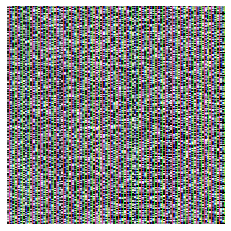

[0.43888134 0.5611187 ]


In [23]:
#________ MAKING A TEST PREDICTION _______

first_predictions = model.predict(X_test[:4])

'''Showing one hot encoded label that the prediction was made on '''
print(y_test[0])

"""Showing the image that the prediction was made on"""
plt.imshow(Image.fromarray(X_test[0],'RGB'), interpolation='nearest')
plt.axis("off")
plt.show()

'''Showing was was actually predicted'''
print(first_predictions[0])

In [24]:
#____ SAVINGS THE TRAINED MODEL ____ 
model.save('my_model.h5')

In [25]:
model_json = model.to_json()
with open("model.json", "w") as json_file:             
     json_file.write(model_json) 

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
